# Pymaceuticals Inc.
---

### Analysis

**Drug Regimen Distribution:** The bar plot generated using both Pandas and Pyplot clearly illustrates the distribution of mouse observations across different drug regimens. This visualization allows you to quickly see that there are varying numbers of observations for each drug regimen, with 'Capomulin' and 'Ramicane' having a notably higher number of timepoints compared to 'Infubinol' and 'Ceftamin'. This suggests that 'Capomulin' and 'Ramicane' were more extensively studied or had more subjects.

**Gender Distribution:** The pie charts, generated both with Pandas and Pyplot, show the distribution of female versus male mice. These visualizations highlight the nearly equal gender distribution in the dataset, which is crucial for ensuring that gender bias doesn't affect the results of the study.

**Tumor Volume Analysis:** The box plot displays the distribution of final tumor volumes for each drug regimen, including potential outliers. It provides a quick visual summary of the spread of tumor volume data, which can be useful in assessing treatment effectiveness. The box plot shows that 'Ramicane' and 'Capomulin' have smaller median tumor volumes compared to 'Infubinol' and 'Ceftamin'. Additionally, potential outliers are identified in 'Infubinol'. This suggests that 'Capomulin' and 'Ramicane' may be more effective treatments with more consistent results, while 'Infubinol' may have more variability in outcomes.

These observations and visualizations help in gaining insights into the data, understanding the distribution of observations across treatments, assessing gender distribution, and analyzing the effectiveness of different drug regimens in reducing tumor volume.





 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined_df= pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="right")

# Display the data table for preview
data_combined_df= data_combined_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                                    "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
data_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice = data_combined_df["Mouse ID"].value_counts()
mice_count= len(mice)
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice= data_combined_df.loc[data_combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data_df= data_combined_df.loc[data_combined_df["Mouse ID"] == "g989", :]
duplicated_mice_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= data_combined_df[data_combined_df["Mouse ID"].isin(duplicated_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mice2 = clean_df["Mouse ID"].value_counts()
mice_count2= len(mice2)
mice_count2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_mean= clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median= clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance= clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std= clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem= clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_table= pd.DataFrame({ "Mean Tumor Volume" : drug_regimen_mean,
                               "Median Tumor Volume":drug_regimen_median,
                               "Tumor Volume Variance":drug_regimen_variance,
                               "Tumor Volume Std. Dev.":drug_regimen_std,
                               "Tumor Volume Std. Err." :drug_regimen_sem })


summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2= clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

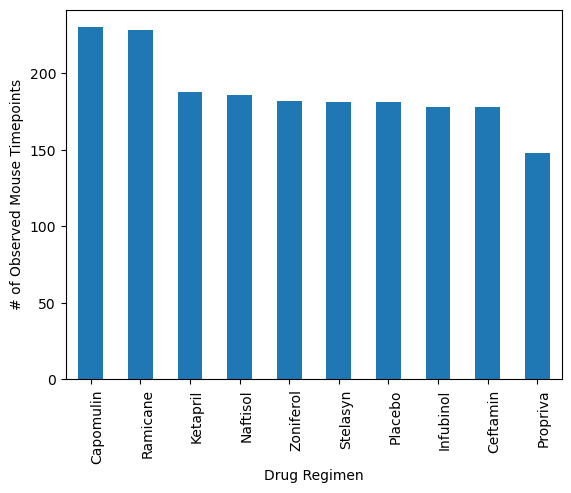

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data= clean_df["Drug Regimen"].value_counts()
pandas_plot=mouse_data.plot(kind="bar", color='tab:blue', xlabel= "Drug Regimen",
                            ylabel="# of Observed Mouse Timepoints")


tick_labels= mouse_data.index
pandas_plot.set_xticklabels(tick_labels, rotation="vertical", ha="right", wrap=True)
plt.show()

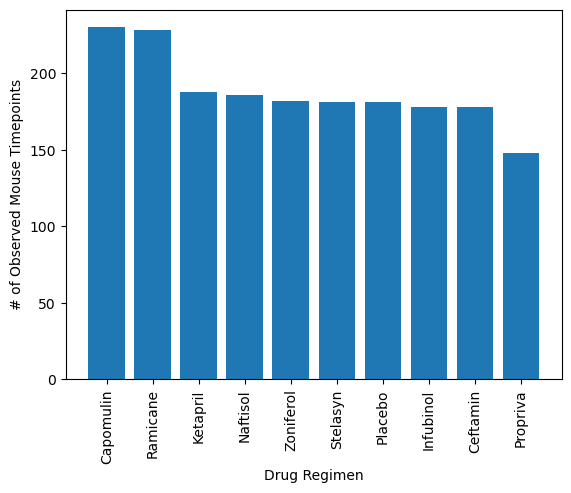

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis=mouse_data.values
x_axis=mouse_data.index.values

plt.bar(x_axis, y_axis, color='tab:blue', align='center', alpha=1)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

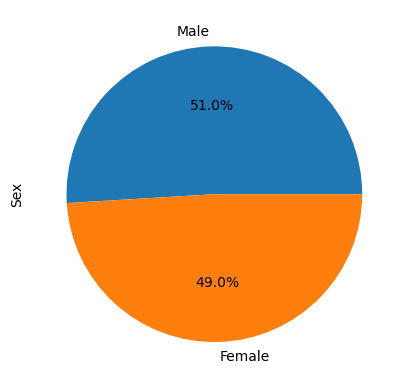

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data= clean_df["Sex"].value_counts()

pandas_pie=gender_data.plot.pie(autopct="%1.1f%%")
pandas_pie.set_ylabel("Sex")
plt.show()

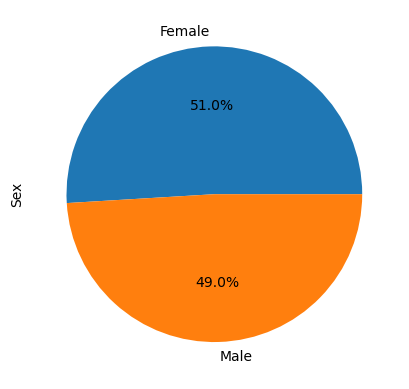

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data2= gender_data.values
labels=["Female", "Male"]
pyplot_pie=plt.pie(gender_data2, autopct="%1.1f%%",labels=labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint= clean_df.groupby("Mouse ID")['Timepoint'].max()
ea_index= last_timepoint.reset_index()

merged_data = ea_index[['Mouse ID','Timepoint']].\
    merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

merged_data






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
outliers={}
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data= merged_data.loc[merged_data["Drug Regimen"] == treatment,:]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    potential_outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    outliers[treatment]= potential_outliers
for treatment in treatments:
    print(f"{treatment}'s potential outliers: {outliers[treatment]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


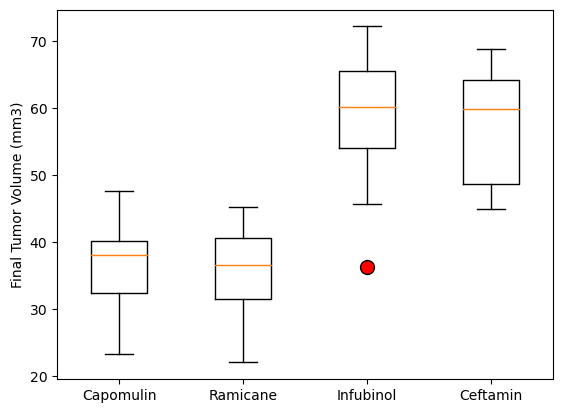

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dot= dict(markerfacecolor = "red", markersize= 10)
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data, labels=treatments, flierprops= dot)
plt.show()

## Line and Scatter Plots

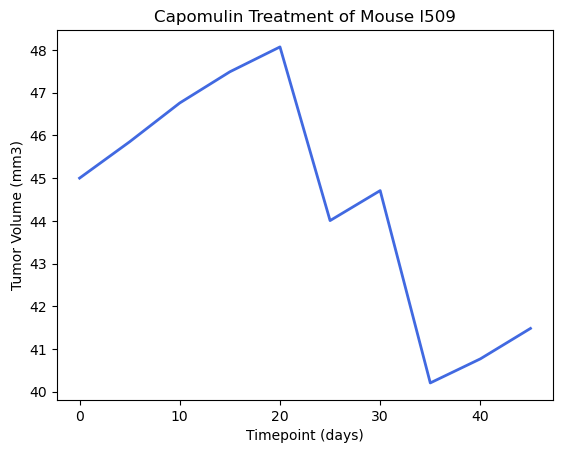

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
timepoint_df= capomulin_df.loc[capomulin_df["Mouse ID"]== "l509",:]
x_axis= timepoint_df["Timepoint"]
y_axis= timepoint_df["Tumor Volume (mm3)"] 
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, color="royalblue", linewidth=2)
plt.show()

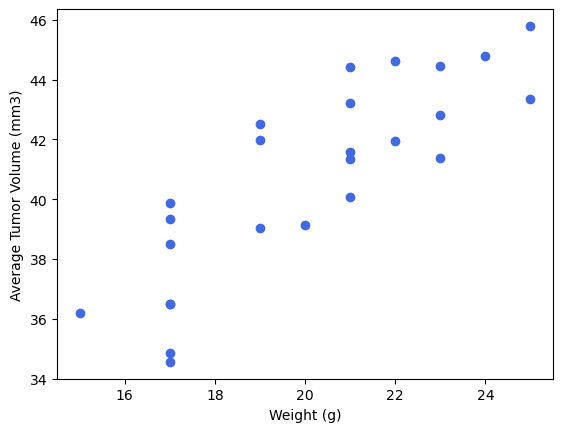

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_ave= capomulin_df.groupby(["Mouse ID"]).mean("Weight (g)","Tumor Volume (mm3)")

plt.scatter(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"], color="royalblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708723
The correlation between mouse weight and the average tumor volume 0.84
y = 0.95x + 21.55


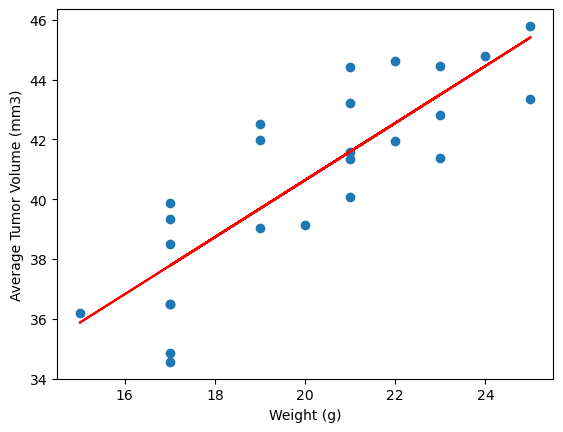

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation= st.pearsonr(capomulin_ave["Weight (g)"],capomulin_ave["Tumor Volume (mm3)"])            
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"])
regress_values = capomulin_ave["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"])
plt.plot(capomulin_ave["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}")
print(line_eq)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()            
            
            